In [36]:
import os
import nltk
import pandas
import re

### Read Data

In [37]:
classDict = {'neg': 0, 'pos': 1,'ntr': 2}
label2id = []
def read_File():
    sentences = []
    labels = []
    scrip_dir = os.path.dirname(os.path.realpath('__file__'))
    rel_path = "data.txt"
    abs_file_path = os.path.join(scrip_dir, rel_path)
    with open(abs_file_path, encoding='utf-8') as f:
        for line in f:
            word = line.split()
            labels.append(word[0])
            label2id.append(classDict[word[0]])
            sentence = re.sub(word[0]+'\t', '', line)
            sentences.append(sentence)
    print('read file complete')
    
    return sentences, labels

In [38]:
sentences, labels = read_File()


read file complete


### Create pandas dataframe

In [39]:
import pandas as pd

data = {'label': labels,
        'sentence': sentences
        }

df = pd.DataFrame(data, columns = ['label', 'sentence'])

df.head()

,label,sentence
0,pos,একজন বাংলাদেশী হিসাবে আমি গর্বিত । আরও গর্বিত ...
1,neg,"কি বিচিত্র এই দেশ, আর একজন ক্বারি ওবায়দুল্ল..."
2,pos,আলহামদুলিল্লাহ একজন বাঙ্গালী হিসাবে গর্ব বোধ ক...
3,pos,"অভিনন্দন তোমা‌কে মুস্তা‌ফিজ, তু‌মি এর উপযুক্ত..."
4,pos,আলহামদুলিল্লাহ। অভিনন্দন সাতক্ষীরা বাসির অহংকা...


In [40]:
df.describe(include='all')

,label,sentence
count,3438,3438
unique,3,2634
top,pos,pos আমি অত্যন্ত খুশি যে আমি আমার স্বপ্ন অর্জন ...
freq,1491,151


<Axes: xlabel='label'>

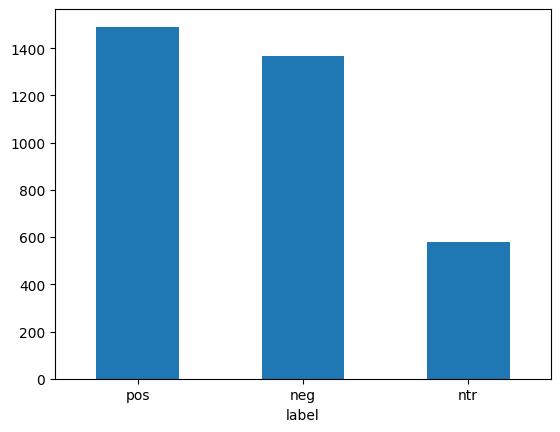

In [41]:
df['label'].value_counts().plot(kind="bar", rot=0)

# Data cleaning

In [42]:
def clean_sentence(sent):

    sent = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent) 
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)
    
    sent = sent.strip()
    return sent

In [43]:
df.loc[150,'sentence']

'চোরের কাছ থেকে vat না নিয়ে ছাত্রদের কাছ থেকে  vat নিচ্ছে  এ কোন ধরনের বর্বরতা! সরকার বলেছেন শিখা হোলো মৌলিক অধিকার এই মৌলিক অধিকারে বাঘ বসালে মৌলিক অধিকার কোথায় থাকে!\n'

In [44]:
for i, sent  in enumerate(df['sentence'].tolist()):
    df.loc[i,'clean_sentence'] = clean_sentence(sent)

In [45]:
test = df.loc[150,'clean_sentence']
test

'চোরের কাছ থেকে না নিয়ে ছাত্রদের কাছ থেকে নিচ্ছে এ কোন ধরনের বর্বরতা সরকার বলেছেন শিখা হোলো মৌলিক অধিকার এই মৌলিক অধিকারে বাঘ বসালে মৌলিক অধিকার কোথায় থাকে'

### Tokenized Sentence

In [46]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

### Remove stopwords

In [47]:
stop_words = {'এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [48]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : চোরের কাছ থেকে না নিয়ে ছাত্রদের কাছ থেকে নিচ্ছে এ কোন ধরনের বর্বরতা সরকার বলেছেন শিখা হোলো মৌলিক অধিকার এই মৌলিক অধিকারে বাঘ বসালে মৌলিক অধিকার কোথায় থাকে
after : চোরের কাছ না ছাত্রদের কাছ নিচ্ছে ধরনের বর্বরতা সরকার বলেছেন শিখা হোলো মৌলিক অধিকার মৌলিক অধিকারে বাঘ বসালে মৌলিক অধিকার কোথায় থাকে


In [49]:
df['clean_data'] = [remove_stop_words(tokenized_data(sent)) for sent in df['clean_sentence'].tolist()]
#del df['sentence']
df.to_csv('sentiment_analysis_clean_data.csv', encoding='utf-8', index=False)

### Word to Vector transformation by ngram approch

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                      token_pattern=u'[\\S]+', tokenizer=None)

X = word_vectorizerGram.fit_transform(df['clean_sentence'])
stpGram = word_vectorizerGram.get_feature_names_out()

print(len(stpGram))


42155


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

word_vectorizerGram_rsw = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\\S]+', tokenizer=None)

X_rsw = word_vectorizerGram_rsw.fit_transform(df['clean_data'])
stpGram_rsw = word_vectorizerGram_rsw.get_feature_names_out()

print(len(stpGram_rsw))
print('Sample of bigram:', stpGram_rsw[20])


37289
Sample of bigram: অংশটুকু ফাইন


In [52]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def sentence_to_vector_transform(line, stpGram):
    # Create a CountVectorizer with the provided vocabulary (stpGram)
    vec = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                          token_pattern=u'[\\S]+', tokenizer=None, vocabulary=stpGram)
    
    # Transform the given sentence into a vector using the provided vocabulary
    sent = vec.transform([line])
    
    # Convert the sparse matrix representation to a dense array
    sent = sent.toarray()
    
    # Squeeze the array to remove single-dimensional entries
    sent = np.squeeze(np.asarray(sent))
    
    return sent


In [53]:
def sentence_to_vector(data, stpGram):
    dataForSVM = []
    colName = []
    dataVec = []
    dataVec.append(colName)
    
    for idx, sent in enumerate(data):
        
        sent = sentence_to_vector_transform(sent, stpGram)
        sentLst = list(sent)
        dtList = []
        try:
            dtList.append(label2id[idx])
            dataForSVM.append(sent)
        except:
            print(idx)
        for item in sentLst:
            dtList.append(item)
        lengthOfEV = len(dtList)
        dataVec.append(dtList)
        
    return dataForSVM

In [54]:
dataForSVM = sentence_to_vector(df['clean_data'], stpGram_rsw)
dataForSVM[0:4]

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]

### Data split for training and testing

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataForSVM, label2id, test_size=0.2, random_state=0)

### Using SVM with different kernel

In [56]:
from sklearn.svm import SVC
C = 0.1  # SVM regularization parameter
linear_svc = SVC(kernel='linear', C=C)
linear_svc = linear_svc.fit(X_train, y_train)

In [57]:
import joblib

filename = 'svc_model.sav'
joblib.dump(linear_svc, filename)


['svc_model.sav']

In [58]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def calculate_accuracy(kernel, model):
    y_pred = model.predict(X_test)
    #print the accuracy score of the model
    print(kernel + " accuracy : ",metrics.accuracy_score(y_test, y_pred, normalize = True))
    score = confusion_matrix(y_test, y_pred)
    print('confusion_matrix: \n', score)

### Accuracy Testing


In [59]:
from sklearn.metrics import classification_report

def report(model):
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = model.predict(X_test)
    
    # Generate the classification report
    report = classification_report(y_test, y_pred, target_names=['Won', 'Loss', 'neutral'])
    
    # Print the classification report
    print(report)


In [60]:
calculate_accuracy(kernel='linear', model=linear_svc)
report(model=linear_svc)

linear accuracy :  0.7906976744186046
confusion_matrix: 
 [[258  16   4]
 [ 45 247   3]
 [ 62  14  39]]
              precision    recall  f1-score   support

         Won       0.71      0.93      0.80       278
        Loss       0.89      0.84      0.86       295
     neutral       0.85      0.34      0.48       115

    accuracy                           0.79       688
   macro avg       0.82      0.70      0.72       688
weighted avg       0.81      0.79      0.78       688



In [61]:
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=10)
rbf_svc = rbf_svc.fit(X_train, y_train)
calculate_accuracy(kernel='rbf', model=rbf_svc)
report(model=rbf_svc)

rbf accuracy :  0.690406976744186
confusion_matrix: 
 [[272   5   1]
 [111 184   0]
 [ 91   5  19]]


In [ ]:
poly_svc = SVC(kernel='poly', degree=3, C=100)
poly_svc = poly_svc.fit(X_train, y_train)
calculate_accuracy(kernel='poly', model=poly_svc)  # Corrected kernel name
report(model=poly_svc)

### ----USING RANDOM FOREST----

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataForSVM, label2id, test_size=0.2, random_state=0)

# Instantiate and train the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Evaluate the model
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
def calculate_accuracy(predictions, actual, modelName):
    total = len(predictions)
    idx = 0
    error = 0
    almostSame = 0
    while idx < total:
        if predictions[idx] != actual[idx]:
            p = predictions[idx]
            a = actual[idx]
            # print('actual=',y_test[idx],'  predict=',predictions[idx])
            if ((a == 0 or a == 1) and (p == 0 or p == 1)) or ((a == 3 or a == 4) and (p == 3 or p == 4)):
                almostSame += 1
            else:
                error += 1
        idx += 1
    print('\n', modelName, '\n')
    print("total=", total)
    print("error=", error)
    print("accuracy = ", ((total - error) * 100) / total)
    print('almost same = ', almostSame)
    print("actual accracy = ", ((total - error - almostSame) * 100) / total)

In [ ]:
y_pred = linear_svc.predict(X_test)
calculate_accuracy(y_pred, y_test, 'Linear')

y_pred_rbf = rbf_svc.predict(X_test)
calculate_accuracy(y_pred_rbf, y_test, 'rbf_svc')

y_pred_poly = poly_svc.predict(X_test)
calculate_accuracy(y_pred_poly, y_test, 'poly_svc')

### ----ACCURACY ON UNSEEN DATA----

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:

    abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=learning_rate)
    
    abc_model = abc.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(abc_model.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(abc_model.score(X_test, y_test)))

### ----OUTPUT----

In [ ]:
sent = 'বাংলাদেশ একটি ভালো দেশ।'
print(classDict)
sent = clean_sentence(sent)
sent2vec = sentence_to_vector_transform(sent, stpGram_rsw)
sent_list = list()
sent_list.append(sent2vec)

loaded_model = joblib.load(filename)
predictions = loaded_model.predict(sent_list)
print(predictions)

ans = ""
for key, value in classDict.items():
    if value == predictions[0]:
        ans = key
print(ans)

In [ ]:
# তোমার মরা উচিত == you should die
# আমি কালো মানুষের ঘৃণা == i hate black people
# দয়া করে বাঁচবেন না == please dont live

# বাংলা ভালো ভাষা == bangla is good language
# বাংলাদেশ একটি ভালো দেশ। == bangladesh is good country
# আমি সবাইকে ভালবাসি == i love everyone

# আমি সবসময় হাসি। == i always smile 
# আমি পানি পান করি == i drink water
# আমি একটা গান গাই। == i sing a song